# Hyperparameter Tuning with Evolutionary Algorithms

In [43]:
# Install library for genetic hyperparameter optimization
!conda install conda-forge::sklearn-genetic -y
!conda install conda-forge::sklearn-genetic-opt -y
# Documentation is here: https://sklearn-genetic-opt.readthedocs.io/en/stable/


Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.

Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.



In [44]:
import matplotlib.pyplot as plt
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Categorical, Integer, Continuous
from sklearn.model_selection import train_test_split, StratifiedKFold
#from sklearn.neural_network import MLPClassifier # more complex classifier
#from sklearn.ensemble import RandomForestClassifier # another complex classifier
from sklearn import neighbors
from sklearn.metrics import accuracy_score

In [45]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

# we only take the first two features to make it more challenging
penguins = pd.read_csv('penguins_size.csv').dropna()
X = penguins[['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm','body_mass_g']].values
scaler = StandardScaler()
X = scaler.fit_transform(X)
le = LabelEncoder()
y = le.fit_transform(penguins['species'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
# param_grid for KNeighborsClassifier :
param_grid = {'n_neighbors': Integer(1, 100),   
               'weights': Categorical(['uniform', 'distance']),   
               'metric': Categorical(['euclidean', 'manhattan','cosine','chebyshev','minkowski','hamming']),
               'p': Continuous(0.1,20) # only used for minkowski distance
            }

In [47]:
clf = neighbors.KNeighborsClassifier()

# Our cross-validation strategy (it could be just an int)
cv = StratifiedKFold(n_splits=3, shuffle=True)

# The main class from sklearn-genetic-opt
evolved_estimator = GASearchCV(estimator=clf,
                              cv=cv,
                              scoring='accuracy',
                              param_grid=param_grid,
                              n_jobs=-1,
                              verbose=True,
                              population_size=10,
                              generations=20)


In [48]:
 # Train and optimize the estimator
evolved_estimator.fit(X_train, y_train)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.882773	0.1636     	0.982739   	0.468032   
1  	20    	0.9721  	0.0110892  	0.978577   	0.939838   
2  	20    	0.976401	0.00287946 	0.982795   	0.974192   
3  	20    	0.979426	0.00461926 	0.991453   	0.974248   
4  	20    	0.983294	0.00557995 	0.991453   	0.978577   
5  	20    	0.987146	0.0043069  	0.991453   	0.982795   
6  	20    	0.987157	0.0042958  	0.991453   	0.982795   
7  	20    	0.987163	0.0042902  	0.991453   	0.98285    
8  	20    	0.9893  	0.0034696  	0.991453   	0.982795   
9  	20    	0.991453	0          	0.991453   	0.991453   
10 	20    	0.992308	0.0017094  	0.995726   	0.991453   
11 	20    	0.993162	0.00209358 	0.995726   	0.991453   
12 	20    	0.99188 	0.00128205 	0.995726   	0.991453   
13 	20    	0.972561	0.052631   	0.995726   	0.815518   
14 	20    	0.99188 	0.00128205 	0.995726   	0.991453   
15 	20    	0.992308	0.0017094  	0.995726   	0.991453   
16 	20    	0.994428	0.0019476  	0.995726   	0.99

GASearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
           estimator=KNeighborsClassifier(metric='euclidean', n_neighbors=3,
                                          p=8.770498545573924,
                                          weights='distance'),
           generations=20, n_jobs=-1,
           param_grid={'metric': <sklearn_genetic.space.space.Categorical object at 0x33d72fa70>,
                       'n_neighbors': <sklearn_genetic.space.space.Integer object at 0x33dc41c10>,
                       'p': <sklearn_genetic.space.space.Continuous object at 0x33d72da30>,
                       'weights': <sklearn_genetic.space.space.Categorical object at 0x33fe7e9f0>},
           population_size=10, return_train_score=True, scoring='accuracy',
           warm_start_configs=[])

In [49]:
# Best parameters found
print(evolved_estimator.best_params_)
# Use the model fitted with the best parameters
y_predict_ga = evolved_estimator.predict(X_test)
print(accuracy_score(y_test, y_predict_ga))


{'n_neighbors': 3, 'weights': 'distance', 'metric': 'euclidean', 'p': 8.770498545573924}
1.0


/Users/nyfe/anaconda3/envs/MLCO2_test/lib/python3.12/site-packages/sklearn_genetic/plots.py:48: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=range(len(estimator)), y=fitness_history, markers=True, palette=palette)


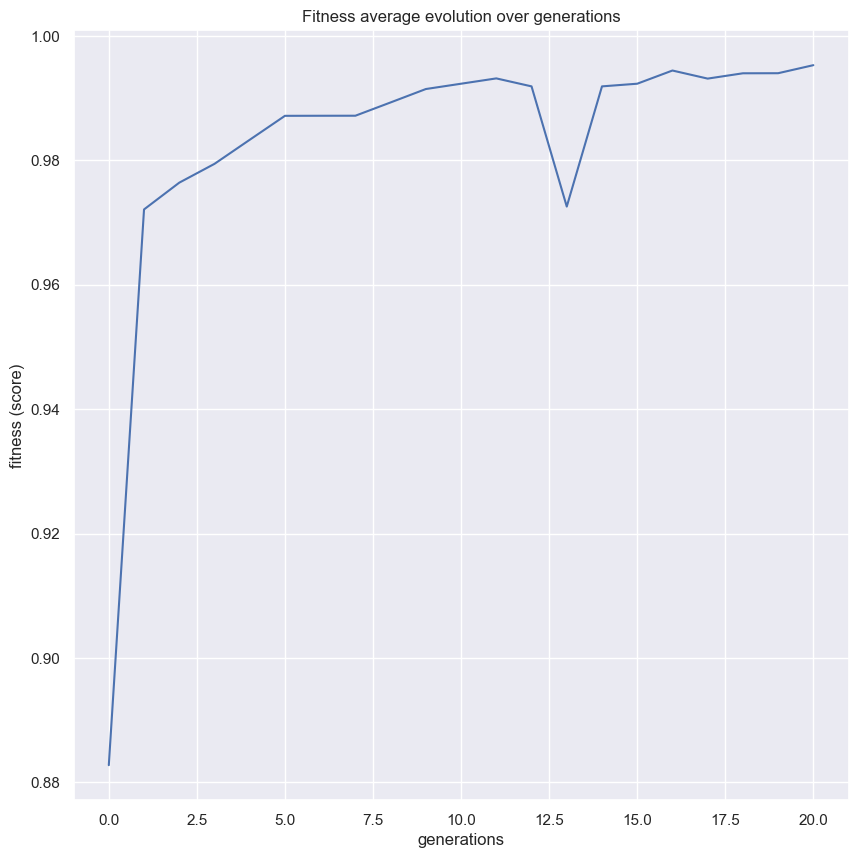

In [50]:
from sklearn_genetic.plots import plot_fitness_evolution
plot_fitness_evolution(evolved_estimator)
plt.show()

# Feature Selection with Genetic Algorithms

In [51]:
import matplotlib.pyplot as plt
from sklearn_genetic import GAFeatureSelectionCV
from sklearn_genetic.plots import plot_fitness_evolution
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import numpy as np

data = load_iris()
X, y = data["data"], data["target"]

noise = np.random.uniform(0, 10, size=(X.shape[0], 10))

X = np.hstack((X, noise))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [52]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(3, weights='uniform')

evolved_estimator = GAFeatureSelectionCV(
    estimator=clf,
    cv=3,
    scoring="accuracy",
    population_size=30,
    generations=20,
    n_jobs=-1,
    verbose=True,
    keep_top_k=2,
    elitism=True,
)

In [53]:
# Train and select the features
evolved_estimator.fit(X_train, y_train)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	30    	0.518568	0.132898   	0.73975    	0.299465   
1  	60    	0.666786	0.0669605  	0.770351   	0.530897   
2  	60    	0.648316	0.138778   	0.819964   	0.339869   
3  	60    	0.650347	0.119122   	0.819964   	0.400772   
4  	60    	0.669004	0.0843054  	0.800059   	0.470588   
5  	60    	0.696633	0.0709193  	0.800059   	0.430184   
6  	60    	0.680402	0.121705   	0.84997    	0.380273   
7  	60    	0.703793	0.125953   	0.859774   	0.371361   
8  	60    	0.715191	0.107692   	0.84997    	0.46019    
9  	60    	0.721519	0.127023   	0.84997    	0.439988   
10 	60    	0.693791	0.166092   	0.84997    	0.410873   
11 	60    	0.744316	0.106201   	0.84997    	0.521093   
12 	60    	0.767617	0.10777    	0.84997    	0.450683   
13 	60    	0.755397	0.127182   	0.84997    	0.49079    
14 	60    	0.730372	0.150043   	0.88978    	0.42038    
15 	60    	0.708011	0.156002   	0.84997    	0.42038    
16 	60    	0.725272	0.143374   	0.84997    	0.41

GAFeatureSelectionCV(estimator=KNeighborsClassifier(n_neighbors=3),
                     generations=20, keep_top_k=2, n_jobs=-1,
                     population_size=30, scoring='accuracy')

In [54]:
features = evolved_estimator.support_

# Predict only with the subset of selected features
y_predict_ga = evolved_estimator.predict(X_test)
accuracy = accuracy_score(y_test, y_predict_ga)
print(evolved_estimator.best_features_)

[False False  True  True False False  True False False False False False
 False False]


/Users/nyfe/anaconda3/envs/MLCO2_test/lib/python3.12/site-packages/sklearn_genetic/plots.py:48: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=range(len(estimator)), y=fitness_history, markers=True, palette=palette)


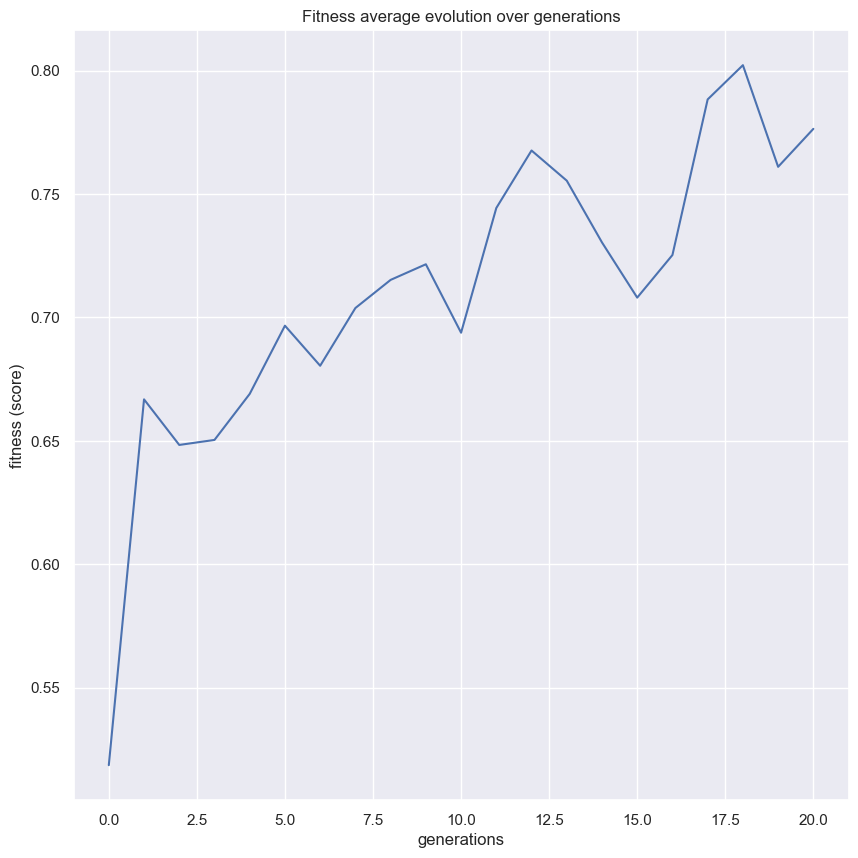

In [55]:
from sklearn_genetic.plots import plot_fitness_evolution
plot_fitness_evolution(evolved_estimator)
plt.show()